Primer modelo de clasificación n-dimensional

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
ruta = "tabla_final.csv"
df = pd.read_csv(ruta)
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN8,OPN9,OPN10,dateload,introelapse,testelapse,endelapse,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,3.0,4.0,5.0,2016-03-03 02:01:01,9.0,234.0,6,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2.0,5.0,3.0,2016-03-03 02:01:20,12.0,179.0,11,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,3.0,4.0,4.0,2016-03-03 02:01:56,3.0,186.0,7,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,4.0,3.0,3.0,2016-03-03 02:02:02,186.0,219.0,7,GB,51.75,-1.25
4,3.0,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,4.0,...,4.0,5.0,2.0,2016-03-03 02:02:57,8.0,315.0,17,KE,1.0,38.0


In [3]:
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)

In [4]:
features = [x for x in df.columns if (len(x) <=5 and x!= 'EXT5') ]

In [5]:
X = df[features]
y = df['EXT5']

In [6]:
X = X.astype(int)
y = y.astype(int)

In [7]:
y = np.where(y>4,1,0)

In [8]:
#Dividimos los datos de entrada, X, y salida, y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [9]:
#Buscamos el modelo
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

#Encontramos el modelo
yhat = model.predict(X_test)

#Evaluamos el desempeño del modelo encontrado
accuracy = accuracy_score(y_test, yhat)
print('Accuracy/exactitud: %.2f' % (accuracy*100), '%')

Accuracy/exactitud: 87.40 %


Característica 0: 33306.752468
Característica 1: 39960.277420
Característica 2: 30978.786105
Característica 3: 27137.832604
Característica 4: 26317.511707
Característica 5: 63678.082433
Característica 6: 13124.574699
Característica 7: 24865.965326
Característica 8: 35928.905892
Característica 9: 1519.460322
Característica 10: 1363.827217
Característica 11: 384.803910
Característica 12: 2313.361853
Característica 13: 585.500101
Característica 14: 903.469374
Característica 15: 470.795245
Característica 16: 1077.089247
Característica 17: 1150.586009
Característica 18: 6619.609676
Característica 19: 1241.809415
Característica 20: 9753.698182
Característica 21: 35.573959
Característica 22: 2390.776608
Característica 23: 6507.713439
Característica 24: 1091.466971
Característica 25: 12978.750977
Característica 26: 4225.474936
Característica 27: 3445.103093
Característica 28: 10432.225389
Característica 29: 523.421778
Característica 30: 72.576429
Característica 31: 338.323865
Característica 32

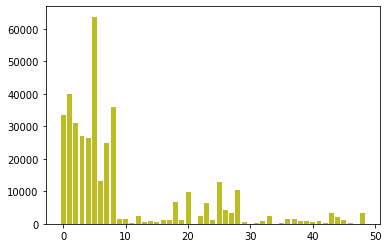

In [10]:
fs = SelectKBest(score_func=chi2, k=4)
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)
    
for i in range(len(fs.scores_)):
    print('Característica %d: %f' % (i, fs.scores_[i]))
    plt.bar([i for i in range(len(fs.scores_))], fs.scores_)

#Buscamos el modelo
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train)

#Encontramos el modelo
yhat = model.predict(X_test_fs)

#Evaluamos el desempeño del modelo encontrado
accuracy = accuracy_score(y_test, yhat)
print('Accuracy/exactitud: %.2f' % (accuracy*100), '%')

Característica 0: 0.079609
Característica 1: 0.107273
Característica 2: 0.112383
Característica 3: 0.095309
Característica 4: 0.083407
Característica 5: 0.125145
Característica 6: 0.055549
Característica 7: 0.066718
Característica 8: 0.117809
Característica 9: 0.024392
Característica 10: 0.022701
Característica 11: 0.030337
Característica 12: 0.021951
Característica 13: 0.022423
Característica 14: 0.019623
Característica 15: 0.022940
Característica 16: 0.021514
Característica 17: 0.024577
Característica 18: 0.032616
Característica 19: 0.025645
Característica 20: 0.071257
Característica 21: 0.018713
Característica 22: 0.040567
Característica 23: 0.041993
Característica 24: 0.031778
Característica 25: 0.058676
Característica 26: 0.044903
Característica 27: 0.041140
Característica 28: 0.066772
Característica 29: 0.023640
Característica 30: 0.019613
Característica 31: 0.033363
Característica 32: 0.023553
Característica 33: 0.023586
Característica 34: 0.021190
Característica 35: 0.028275
Ca

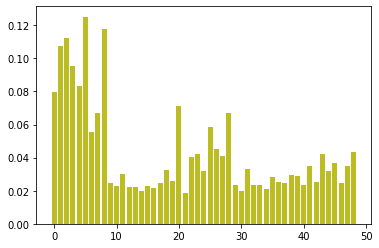

In [11]:
fs = SelectKBest(score_func=mutual_info_classif, k=4)
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

for i in range(len(fs.scores_)):
    print('Característica %d: %f' % (i, fs.scores_[i]))    
    plt.bar([i for i in range(len(fs.scores_))], fs.scores_)

#Buscamos el modelo
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train)

#Encontramos el modelo
yhat = model.predict(X_test_fs)

#Evaluamos el desempeño del modelo encontrado
accuracy = accuracy_score(y_test, yhat)
print('Accuracy/exactitud: %.2f' % (accuracy*100), '%')